In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os



In [ ]:
for dirname, _, filenames in os.walk('./data/recordings/'):
    for filename in filenames:
        pass  # comment this and uncomment the next line to see all files
        # print(os.path.join(dirname, filename))


In [2]:
import pandas as pd       
import os 
import math 
import numpy as np
import matplotlib.pyplot as plt  
import IPython.display as ipd  # To play sound in the notebook
import librosa
import librosa.display
from tqdm import *
from keras.callbacks import (
    EarlyStopping, 
    LearningRateScheduler,
    ModelCheckpoint, 
    TensorBoard, 
    ReduceLROnPlateau
)



In [3]:
# !pip install ffmpeg
# os.chdir("./data/recordings/") # this changes directory, not needed
# import warnings
# warnings.filterwarnings('ignore')
# 
OUTPUT_DIR = './working/'

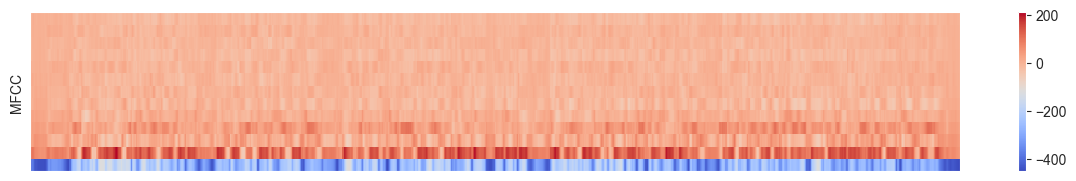

In [4]:
# MFCC for female 
SAMPLE_RATE = 22050
fname_f = './data/recordings/afrikaans1.mp3'

y, sr = librosa.load(fname_f, sr=SAMPLE_RATE, duration = 20)# Chop audio at 10 secs...
mfcc = librosa.feature.mfcc(y=y, sr=SAMPLE_RATE, n_mfcc = 13)# 10 MFCC components

plt.figure(figsize=(15, 7))
plt.subplot(3,1,1)
librosa.display.specshow(mfcc)
plt.ylabel('MFCC')
plt.colorbar()

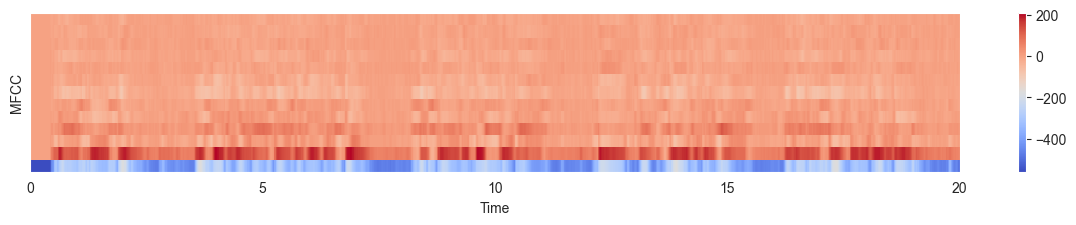

In [5]:
# MFCC for male  
SAMPLE_RATE = 22050
y, sr = librosa.load('./data/recordings/english381.mp3', sr=SAMPLE_RATE, duration = 20)
mfcc = librosa.feature.mfcc(y=y, sr=SAMPLE_RATE, n_mfcc = 13)

plt.figure(figsize=(15, 7))
plt.subplot(3,1,1)
librosa.display.specshow(mfcc, x_axis='time')
plt.ylabel('MFCC')
plt.colorbar()

In [6]:
data = pd.read_csv('./data/speakers_all.csv')

In [7]:
data.head()

,age,age_onset,birthplace,filename,native_language,sex,speakerid,country,file_missing?,Unnamed: 9,Unnamed: 10,Unnamed: 11
0,24.0,12.0,"koussi, senegal",balanta,balanta,male,788,senegal,True,NaN,NaN,NaN
1,18.0,10.0,"buea, cameroon",cameroon,cameroon,male,1953,cameroon,True,NaN,NaN,NaN
2,48.0,8.0,"hong, adamawa, nigeria",fulfulde,fulfulde,male,1037,nigeria,True,NaN,NaN,NaN
3,42.0,42.0,"port-au-prince, haiti",haitian,haitian,male,1165,haiti,True,NaN,NaN,NaN
4,40.0,35.0,"port-au-prince, haiti",haitian,haitian,male,1166,haiti,True,NaN,NaN,NaN


In [8]:
data.tail()

,age,age_onset,birthplace,filename,native_language,sex,speakerid,country,file_missing?,Unnamed: 9,Unnamed: 10,Unnamed: 11
2167,46.0,5.0,"lagos, nigeria",yoruba3,yoruba,female,766,nigeria,False,NaN,NaN,NaN
2168,46.0,12.0,"lagos, nigeria",yoruba4,yoruba,male,851,nigeria,False,NaN,NaN,NaN
2169,47.0,2.0,"ibadan, nigeria",yoruba5,yoruba,female,2023,nigeria,False,NaN,NaN,NaN
2170,31.0,1.0,"bethel, alaska, usa",yupik1,yupik,female,571,usa,False,NaN,NaN,NaN
2171,24.0,14.0,"bulawayo, zimbabwe",zulu1,zulu,female,406,zimbabwe,False,NaN,NaN,NaN


In [9]:
data[data['native_language']=='english']

,age,age_onset,birthplace,filename,native_language,sex,speakerid,country,file_missing?,Unnamed: 9,Unnamed: 10,Unnamed: 11
363,42.0,0.0,"pittsburgh, pennsylvania, usa",english1,english,male,61,usa,False,NaN,NaN,NaN
364,35.0,0.0,"davenport, iowa, usa",english10,english,female,62,usa,False,NaN,NaN,NaN
365,23.0,0.0,"miami, florida, usa",english100,english,female,63,usa,False,NaN,NaN,NaN
366,18.0,0.0,"toronto, ontario, canada",english101,english,female,64,canada,False,NaN,NaN,NaN
367,22.0,0.0,"torrington, connecticut, usa",english102,english,male,65,usa,False,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
937,18.0,0.0,"mishawaka, indiana, usa",english95,english,male,160,usa,False,NaN,NaN,NaN
938,31.0,0.0,"point pleasant, new jersey, usa",english96,english,male,161,usa,False,NaN,NaN,NaN
939,42.0,0.0,"wilmington nc, north carolina, usa",english97,english,male,162,usa,False,NaN,NaN,NaN
940,22.0,0.0,"spokane, washington, usa",english98,english,male,163,usa,False,NaN,NaN,NaN


In [10]:
data[data['file_missing?']=='True'].count()

age                0
age_onset          0
birthplace         0
filename           0
native_language    0
sex                0
speakerid          0
country            0
file_missing?      0
Unnamed: 9         0
Unnamed: 10        0
Unnamed: 11        0
dtype: int64

Let's found gender class distribution:

In [11]:
data['sex'].value_counts()

sex
male      1123
female    1048
famale       1
Name: count, dtype: int64

In [12]:
res=data['native_language'].value_counts()

In [13]:
res1 =data[data['native_language']!='english'].native_language.value_counts()

In [14]:
res1[res>40].sum()

587

In [15]:
dg=data.groupby("native_language").filter(lambda x: len(x) > 40)

In [16]:
# Unseen data for testing later
test_data = data.groupby("native_language").filter(lambda x: len(x) < 40)

In [17]:
dg.sex.value_counts()

sex
male      612
female    554
Name: count, dtype: int64

In [18]:
dg['native_language'].value_counts()

native_language
english       579
spanish       162
arabic        102
mandarin       65
french         63
korean         52
portuguese     48
russian        48
dutch          47
Name: count, dtype: int64

In [19]:
data.shape

(2172, 12)

In [20]:
dg.shape

(1166, 12)

In [21]:
dg['filename'] = dg['filename'].apply(lambda x: x+'.mp3')

In [22]:
dg.head()

,age,age_onset,birthplace,filename,native_language,sex,speakerid,country,file_missing?,Unnamed: 9,Unnamed: 10,Unnamed: 11
70,38.0,12.0,"riyadh, saudi arabia",arabic1.mp3,arabic,female,11,saudi arabia,False,NaN,NaN,NaN
71,26.0,5.0,"cairo, egypt",arabic10.mp3,arabic,male,12,egypt,False,NaN,NaN,NaN
72,40.0,10.0,"beirut, lebanon",arabic100.mp3,arabic,female,2159,lebanon,False,NaN,NaN,NaN
73,21.0,10.0,"doha, qatar",arabic101.mp3,arabic,male,2160,qatar,False,NaN,NaN,NaN
74,22.0,3.0,"jiddah, saudi arabia",arabic102.mp3,arabic,male,2161,saudi arabia,False,NaN,NaN,NaN


In [23]:
dg.drop(columns=['Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11'],inplace=True)

In [24]:
dg.head()

,age,age_onset,birthplace,filename,native_language,sex,speakerid,country,file_missing?
70,38.0,12.0,"riyadh, saudi arabia",arabic1.mp3,arabic,female,11,saudi arabia,False
71,26.0,5.0,"cairo, egypt",arabic10.mp3,arabic,male,12,egypt,False
72,40.0,10.0,"beirut, lebanon",arabic100.mp3,arabic,female,2159,lebanon,False
73,21.0,10.0,"doha, qatar",arabic101.mp3,arabic,male,2160,qatar,False
74,22.0,3.0,"jiddah, saudi arabia",arabic102.mp3,arabic,male,2161,saudi arabia,False


In [25]:
dg['accent'] = dg['native_language'].apply(lambda x: 'native' if x=='english' else 'non-native')

In [26]:
dg['accent'].value_counts()

accent
non-native    587
native        579
Name: count, dtype: int64

In [27]:
def feature_extractor(files, feature_type='mfcc'):
    features = []
    SAMPLE_RATE = 22050
    dire = 'recordings/'
    if feature_type == 'mfcc':
        for file in files:
            f_name = str(dire+file)
            y, sr = librosa.load(f_name, sr=SAMPLE_RATE, duration = 10)
            mfcc = librosa.feature.mfcc(y=y, sr=SAMPLE_RATE, n_mfcc = 10)
            features.append(mfcc)
    return features


In [28]:
# features = feature_extractor(dg['filename'])

In [29]:
# features[0]

In [30]:
class Config(object):
    def __init__(
            self,sampling_rate=16000, 
            audio_duration=2,
            n_classes=10, 
            learning_rate=0.0001, 
            max_epochs=20, 
            n_mfcc=40
        ):
        self.sampling_rate = sampling_rate
        self.audio_duration = audio_duration
        self.n_classes = n_classes
        self.n_mfcc = n_mfcc
        self.learning_rate = learning_rate
        self.max_epochs = max_epochs
        self.audio_length = self.sampling_rate * self.audio_duration
        self.dim = (self.n_mfcc, 1 + int(np.floor(self.audio_length/512)), 1)

def prepare_data(fnames, config, data_dir):
    X = np.empty(shape=(len(fnames), config.dim[0], config.dim[1], 1))
    input_length = config.audio_length
    for i, fname in tqdm_notebook(enumerate(fnames), total=len(fnames)):
        file_path = os.path.join(data_dir, fname)
        data, _ = librosa.core.load(file_path, sr=config.sampling_rate, res_type="kaiser_fast")

        # Random offset / Padding
        if len(data) > input_length:
            max_offset = len(data) - input_length
            offset = np.random.randint(max_offset)
            data = data[offset:(input_length+offset)]
        else:
            if input_length > len(data):
                max_offset = input_length - len(data)
                offset = np.random.randint(max_offset)
            else:
                offset = 0
            data = np.pad(data, (offset, input_length - len(data) - offset), "constant")

        data = librosa.feature.mfcc(y=data, sr=config.sampling_rate, n_mfcc=config.n_mfcc)
        data = np.expand_dims(data, axis=-1)
        X[i,] = data
    return X


In [31]:
X_fnames = np.array(dg['filename'])
data_path = './data/recordings/'

config = Config(sampling_rate=22050, audio_duration=20, learning_rate=0.0001, n_mfcc=13, n_classes=2)
feature_file_path = OUTPUT_DIR+'mfcc_features.npy'
# feature_file_path = '/kaggle/input/speechdetection/mfcc_features.npy'
if os.path.exists(feature_file_path):
    X = np.load(feature_file_path)
else:
    X = prepare_data(X_fnames, config, data_path)
    np.save(feature_file_path, X)

C:\Users\musah\AppData\Local\Temp\ipykernel_9552\1893159312.py:15: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i, fname in tqdm_notebook(enumerate(fnames), total=len(fnames)):


  0%|          | 0/1166 [00:00<?, ?it/s]

In [32]:
# with open(OUTPUT_DIR+'mfcc_features.npy', 'wb+') as f:
#     np.save(f, X)

In [33]:
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

y_gender = dg['sex']
y_accent = dg['accent']

encoder = LabelEncoder()
encoder.fit(y_gender)
y_gender = encoder.transform(y_gender)

encoder1 = LabelEncoder()
encoder1.fit(y_accent)
y_accent = encoder1.transform(y_accent)
y_gender = to_categorical(np.array(y_gender))
y_accent = to_categorical(np.array(y_accent))

Normalization

Normalization is a crucial preprocessing step. The simplest method is rescaling the range of features to scale the range in [0, 1].

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_gender_train, y_gender_test, y_accent_train, y_accent_test = train_test_split(X, y_gender, y_accent, test_size=0.2, random_state=10)
print ('Train set:', X_train.shape,  y_gender_train.shape)
print ('Test set:', X_test.shape,  y_gender_test.shape)

X_train, X_val, y_gender_train, y_gender_val, y_accent_train, y_accent_val = train_test_split(X_train, y_gender_train, y_accent_train, test_size=0.15, random_state=10)

mean = np.mean(X_train, axis=0)
std = np.std(X_train, axis=0)

X_train = (X_train - mean)/std
X_val = (X_val - mean)/std
X_test = (X_test - mean)/std

Train set: (932, 13, 862, 1) (932, 2)
Test set: (234, 13, 862, 1) (234, 2)


In [ ]:
f_name = './data/new_recordings/afrikaans1.mp3'
y, sr = librosa.load(f_name, sr=SAMPLE_RATE, duration=5)
y_1, sr_1 = librosa.load(f_name, sr=SAMPLE_RATE, duration=2)


In [35]:
print ('Label accent set:', y_accent_train.shape,  y_accent_test.shape)

Label accent set: (792, 2) (234, 2)


# Simple Multilayer Feedforward Neural Network

In [36]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense,Dropout,Activation, Flatten, Input, Conv2D, BatchNormalization, MaxPooling2D, LSTM, Concatenate
from tensorflow.keras.optimizers import Adam
from sklearn import metrics
import tensorflow as tf
from keras.regularizers import l2

In [37]:
input_layer = Input(shape=(13, 862), name='Input')

dense1=Dense(128, activation='relu',name='Hidden_1')(input_layer)
dropout1 = Dropout(0.5)(dense1)

dense2=Dense(256, activation='relu',name='Hidden_2')(dropout1)
dropout2 = Dropout(0.5)(dense2)

dense3=Dense(128, activation='relu',name='Hidden_3')(dropout2)
dropout3 = Dropout(0.5)(dense3)
m = tf.keras.layers.Flatten()(dropout3)

out_accent = Dense(2, activation='sigmoid',name='output_accent')(m)
out_gender = Dense(2, activation='sigmoid',name='output_gender')(m)


model_ffn = Model(inputs = input_layer ,outputs=[out_accent, out_gender])


In [38]:
model_ffn.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 Input (InputLayer)          [(None, 13, 862)]            0         []                            
                                                                                                  
 Hidden_1 (Dense)            (None, 13, 128)              110464    ['Input[0][0]']               
                                                                                                  
 dropout (Dropout)           (None, 13, 128)              0         ['Hidden_1[0][0]']            
                                                                                                  
 Hidden_2 (Dense)            (None, 13, 256)              33024     ['dropout[0][0]']             
                                                                                              

In [39]:
model_ffn.compile(optimizer='Adam',loss={'output_accent':'binary_crossentropy','output_gender': 'binary_crossentropy'}, metrics ={'output_accent': 'accuracy', 'output_gender': 'accuracy'})

In [40]:
## Training my model
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime 

num_epochs = 10 # 70 change this to 70 or higher
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath=OUTPUT_DIR + 'saved_models/audio_classification_ffn.hdf5', mode='min',
                               verbose=1, save_best_only=True,patience=10, monitor='val_loss')
early_stopping = EarlyStopping(monitor="val_loss", mode="min", patience=10)

start = datetime.now()

history = model_ffn.fit(X_train, {"output_accent": y_accent_train, "output_gender": y_gender_train},validation_data=(X_val,{"output_accent": y_accent_val, "output_gender": y_gender_val}),
                        batch_size=num_batch_size, epochs=num_epochs, callbacks=[checkpointer, early_stopping], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/10
24/25 [===========================>..] - ETA: 0s - loss: 1.7759 - output_accent_loss: 0.9018 - output_gender_loss: 0.8741 - output_accent_accuracy: 0.5221 - output_gender_accuracy: 0.5404
Epoch 1: val_loss improved from inf to 1.32926, saving model to ./working/saved_models\audio_classification_ffn.hdf5
25/25 [==============================] - 3s 48ms/step - loss: 1.7694 - output_accent_loss: 0.8983 - output_gender_loss: 0.8711 - output_accent_accuracy: 0.5227 - output_gender_accuracy: 0.5429 - val_loss: 1.3293 - val_output_accent_loss: 0.6774 - val_output_gender_loss: 0.6518 - val_output_accent_accuracy: 0.5929 - val_output_gender_accuracy: 0.6071
Epoch 2/10
 1/25 [>.............................] - ETA: 0s - loss: 1.4033 - output_accent_loss: 0.7307 - output_gender_loss: 0.6726 - output_accent_accuracy: 0.5625 - output_gender_accuracy: 0.6562

C:\Users\musah\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


23/25 [==========================>...] - ETA: 0s - loss: 1.5060 - output_accent_loss: 0.7742 - output_gender_loss: 0.7318 - output_accent_accuracy: 0.5462 - output_gender_accuracy: 0.5802
Epoch 2: val_loss improved from 1.32926 to 1.32230, saving model to ./working/saved_models\audio_classification_ffn.hdf5
25/25 [==============================] - 1s 26ms/step - loss: 1.5063 - output_accent_loss: 0.7725 - output_gender_loss: 0.7337 - output_accent_accuracy: 0.5467 - output_gender_accuracy: 0.5694 - val_loss: 1.3223 - val_output_accent_loss: 0.6743 - val_output_gender_loss: 0.6480 - val_output_accent_accuracy: 0.5786 - val_output_gender_accuracy: 0.7000
Epoch 3/10
24/25 [===========================>..] - ETA: 0s - loss: 1.3925 - output_accent_loss: 0.7071 - output_gender_loss: 0.6854 - output_accent_accuracy: 0.6003 - output_gender_accuracy: 0.6237
Epoch 3: val_loss improved from 1.32230 to 1.30764, saving model to ./working/saved_models\audio_classification_ffn.hdf5
25/25 [============

### Evaluation

In [41]:
results = model_ffn.evaluate(X_test, {"output_accent": y_accent_test, "output_gender": y_gender_test})
print(results)

8/8 [==============================] - 0s 6ms/step - loss: 0.9286 - output_accent_loss: 0.6003 - output_gender_loss: 0.3283 - output_accent_accuracy: 0.6624 - output_gender_accuracy: 0.8675
[0.9285955429077148, 0.6003381609916687, 0.32825735211372375, 0.6623931527137756, 0.867521345615387]


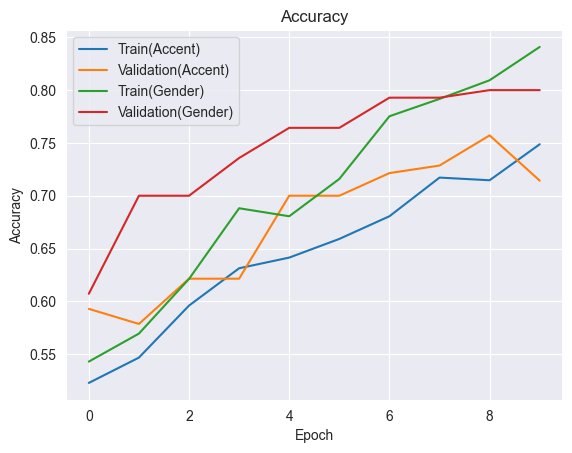

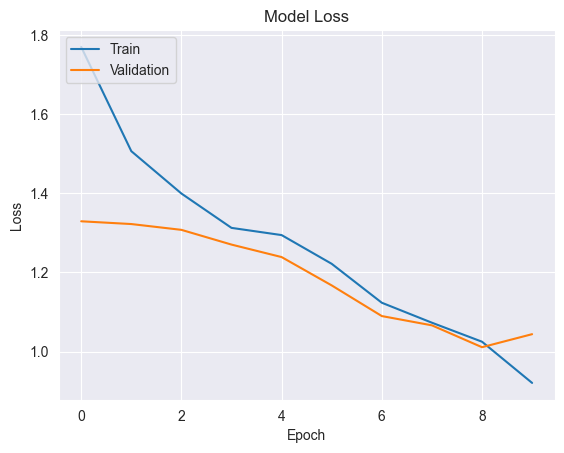

In [42]:
# Plot training and validation accuracy values
plt.plot(history.history['output_accent_accuracy'])
plt.plot(history.history['val_output_accent_accuracy'])
plt.plot(history.history['output_gender_accuracy'])
plt.plot(history.history['val_output_gender_accuracy'])
plt.title('Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train(Accent)','Validation(Accent)', 'Train(Gender)','Validation(Gender)'], loc = 'upper left')
plt.show()

# Plot training and validation accuracy values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'], loc = 'upper left')
plt.show()

In [43]:
accent_prediction, gender_prediction = model_ffn.predict(X_test)
prediction_accent_rounded = [np.argmax(i) for i in accent_prediction]
# prediction_ANN_rounded[0]
y_test_index = [np.argmax(i) for i in y_accent_test]

8/8 [==============================] - 0s 5ms/step


In [44]:
from sklearn.metrics import classification_report

print(classification_report(y_test_index, prediction_accent_rounded))

              precision    recall  f1-score   support

           0       0.63      0.76      0.69       116
           1       0.71      0.57      0.63       118

    accuracy                           0.66       234
   macro avg       0.67      0.66      0.66       234
weighted avg       0.67      0.66      0.66       234


Text(120.72222222222221, 0.5, 'True_value')

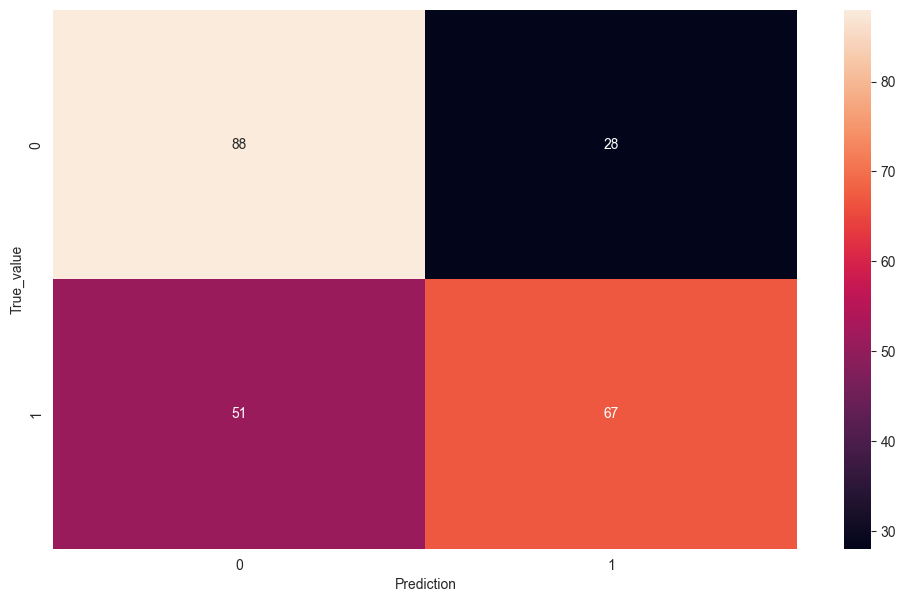

In [45]:
import tensorflow as tf

#Confusion Matrix - verify accuracy of each class
import seaborn as sns
cm = tf.math.confusion_matrix(labels = y_test_index, predictions = prediction_accent_rounded)
plt.figure(figsize = (12,7))
sns.heatmap(cm,annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('True_value')

In [46]:
prediction_gender_rounded = [np.argmax(i) for i in gender_prediction]
# prediction_ANN_rounded[0]
y_test_gender_index = [np.argmax(i) for i in y_gender_test]

Text(120.72222222222221, 0.5, 'True_value')

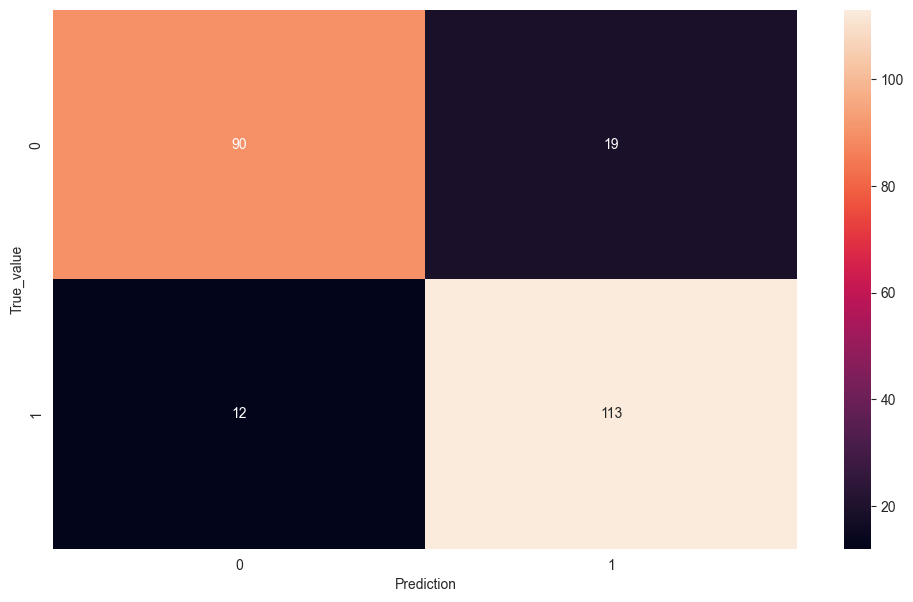

In [47]:
cm = tf.math.confusion_matrix(labels = y_test_gender_index, predictions = prediction_gender_rounded)
plt.figure(figsize = (12,7))
sns.heatmap(cm,annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('True_value')

In [48]:
from sklearn.metrics import classification_report

print(classification_report(y_test_gender_index, prediction_gender_rounded))

              precision    recall  f1-score   support

           0       0.88      0.83      0.85       109
           1       0.86      0.90      0.88       125

    accuracy                           0.87       234
   macro avg       0.87      0.86      0.87       234
weighted avg       0.87      0.87      0.87       234


# CNN

### CNN- Accent classification

In [49]:
def create_cnn_model(input_shape=None):
    # Create CNN model
    input_layer = Input(shape=(13, 862, 1), name='Input')
    # conv 1
    conv = Conv2D(32, 3, padding='same', activation='relu')(input_layer)
    batchnorm = BatchNormalization()(conv)
    maxpool = MaxPooling2D(pool_size=(2, 2))(batchnorm)
    batchnorm1 = BatchNormalization()(maxpool)
    # conv 2
    conv1 = Conv2D(32, 3, padding='same', activation='relu')(batchnorm1)
    batchnorm2 = BatchNormalization()(conv1)
    maxpool1 = MaxPooling2D(pool_size=(2, 2))(batchnorm2)
    batchnorm3 = BatchNormalization()(maxpool1)
    # conv 3
    conv2 = Conv2D(128, 3, padding='same', activation='relu', name='conv2')(batchnorm3)
    batchnorm4 = BatchNormalization()(conv2)
    maxpool2 = MaxPooling2D(pool_size=(2, 2))(batchnorm4)
    batchnorm5 = BatchNormalization()(maxpool2)
    # flatten
    flatten = Flatten()(batchnorm5)
    dense = Dense(64, activation='relu',name='Hidden_1')(flatten)
    dropout = Dropout(0.5)(dense)
    # output
    out = Dense(2, activation='sigmoid',name='output')(dropout)
    model = Model(inputs = input_layer ,outputs=out)
    return model


In [50]:
model_cnn_accent = create_cnn_model()

In [51]:
model_cnn_accent.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (InputLayer)          [(None, 13, 862, 1)]      0         
                                                                 
 conv2d (Conv2D)             (None, 13, 862, 32)       320       
                                                                 
 batch_normalization (Batch  (None, 13, 862, 32)       128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 6, 431, 32)        0         
 D)                                                              
                                                                 
 batch_normalization_1 (Bat  (None, 6, 431, 32)        128       
 chNormalization)                                                
                                                           

In [52]:
tf.keras.utils.plot_model(model_cnn_accent, to_file='cnn_model.png', show_shapes=True, show_layer_names=False)


You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [53]:
model_cnn_accent.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer='adam')

In [54]:
## Trianing my model
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime 

num_epochs = 35
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath=OUTPUT_DIR +'saved_models/accent_classification_cnn.h5', 
                               verbose=1, save_best_only=True,patience=10, mode='max', monitor='val_accuracy')
early_stopping = EarlyStopping(monitor="val_loss", mode="min", patience=5)

start = datetime.now()

history = model_cnn_accent.fit(X_train, y_accent_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_val, y_accent_val), callbacks=[checkpointer,early_stopping], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/35
25/25 [==============================] - ETA: 0s - loss: 1.2431 - accuracy: 0.6098
Epoch 1: val_accuracy improved from -inf to 0.52857, saving model to ./working/saved_models\accent_classification_cnn.h5
25/25 [==============================] - 15s 489ms/step - loss: 1.2431 - accuracy: 0.6098 - val_loss: 0.8261 - val_accuracy: 0.5286


C:\Users\musah\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 2/35
25/25 [==============================] - ETA: 0s - loss: 0.6574 - accuracy: 0.8270
Epoch 2: val_accuracy did not improve from 0.52857
25/25 [==============================] - 12s 497ms/step - loss: 0.6574 - accuracy: 0.8270 - val_loss: 0.9475 - val_accuracy: 0.5286
Epoch 3/35
25/25 [==============================] - ETA: 0s - loss: 0.3532 - accuracy: 0.9116
Epoch 3: val_accuracy improved from 0.52857 to 0.53571, saving model to ./working/saved_models\accent_classification_cnn.h5
25/25 [==============================] - 12s 462ms/step - loss: 0.3532 - accuracy: 0.9116 - val_loss: 0.7072 - val_accuracy: 0.5357
Epoch 4/35
25/25 [==============================] - ETA: 0s - loss: 0.1630 - accuracy: 0.9684
Epoch 4: val_accuracy did not improve from 0.53571
25/25 [==============================] - 11s 436ms/step - loss: 0.1630 - accuracy: 0.9684 - val_loss: 1.5370 - val_accuracy: 0.5286
Epoch 5/35
25/25 [==============================] - ETA: 0s - loss: 0.0899 - accuracy: 0.9798
Ep

In [55]:
results_accent = model_cnn_accent.evaluate(X_test, y_accent_test)
print(results_accent)

8/8 [==============================] - 1s 92ms/step - loss: 2.2630 - accuracy: 0.5043
[2.2629523277282715, 0.504273533821106]


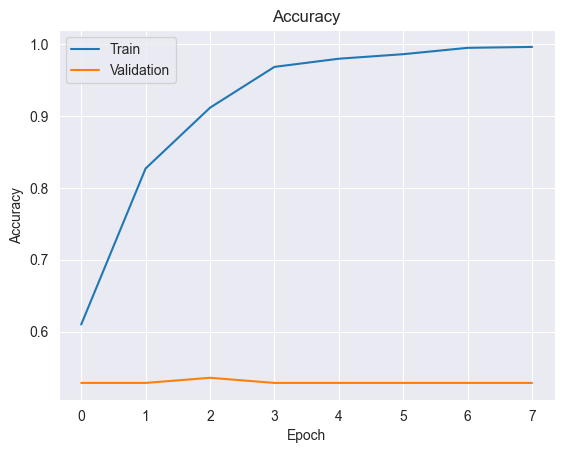

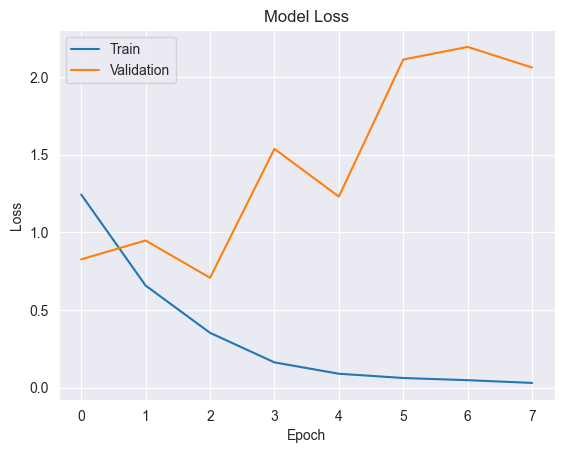

In [56]:
# Plot training and validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'], loc = 'upper left')
plt.show()

# Plot training and validation accuracy values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'], loc = 'upper left')
plt.show()

### CNN - Gender classification

In [57]:
model_cnn_gender = create_cnn_model()

In [58]:
model_cnn_gender.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer='adam')

In [59]:
## Trianing my model
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime 

num_epochs = 35
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath=OUTPUT_DIR +'saved_models/gender_classification_cnn.h5', 
                               verbose=1, save_best_only=True,patience=5, mode='max', monitor='val_accuracy')
early_stopping = EarlyStopping(monitor="val_loss", mode="min", patience=5)

start = datetime.now()

history_gender = model_cnn_gender.fit(X_train, y_gender_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_val, y_gender_val), callbacks=[checkpointer, early_stopping], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/35
25/25 [==============================] - ETA: 0s - loss: 1.2854 - accuracy: 0.6351
Epoch 1: val_accuracy improved from -inf to 0.48571, saving model to ./working/saved_models\gender_classification_cnn.h5
25/25 [==============================] - 13s 430ms/step - loss: 1.2854 - accuracy: 0.6351 - val_loss: 0.6953 - val_accuracy: 0.4857
Epoch 2/35
25/25 [==============================] - ETA: 0s - loss: 0.3423 - accuracy: 0.9306
Epoch 2: val_accuracy improved from 0.48571 to 0.49286, saving model to ./working/saved_models\gender_classification_cnn.h5
25/25 [==============================] - 11s 435ms/step - loss: 0.3423 - accuracy: 0.9306 - val_loss: 0.6731 - val_accuracy: 0.4929
Epoch 3/35
25/25 [==============================] - ETA: 0s - loss: 0.1415 - accuracy: 0.9747
Epoch 3: val_accuracy improved from 0.49286 to 0.77857, saving model to ./working/saved_models\gender_classification_cnn.h5
25/25 [==============================] - 11s 430ms/step - loss: 0.1415 - accuracy: 0.

In [60]:
results_gender = model_cnn_gender.evaluate(X_test, y_gender_test)
print(results_gender)

8/8 [==============================] - 1s 91ms/step - loss: 0.2011 - accuracy: 0.9316
[0.20108333230018616, 0.9316239356994629]


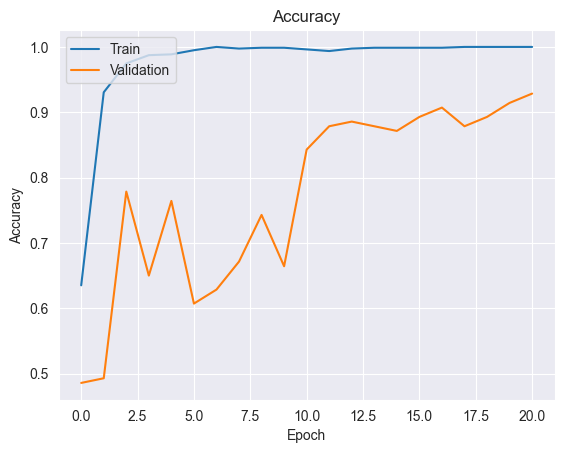

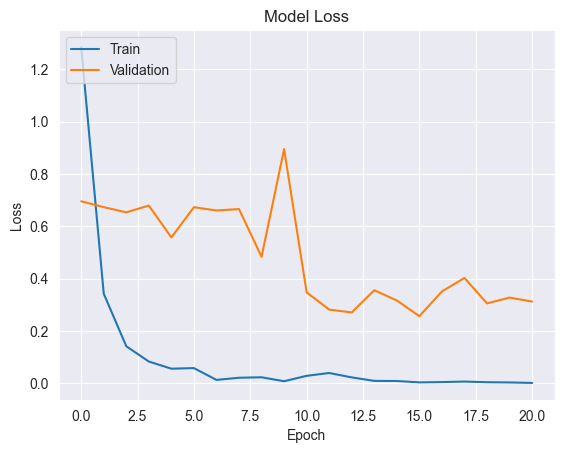

In [61]:
# Plot training and validation accuracy values
plt.plot(history_gender.history['accuracy'])
plt.plot(history_gender.history['val_accuracy'])
plt.title('Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'], loc = 'upper left')
plt.show()

# Plot training and validation accuracy values
plt.plot(history_gender.history['loss'])
plt.plot(history_gender.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'], loc = 'upper left')
plt.show()

### Multi-task Learning using ConvNets: Accent and Gender

In [62]:
def create_multitask_cnn():
    # Create CNN model
    input_layer = Input(shape=(13, 862,1), name='Input')
    # conv 1
    conv = Conv2D(32, 3, padding='same', activation='relu')(input_layer)
    batchnorm = BatchNormalization()(conv)
    maxpool = MaxPooling2D(pool_size=(2, 2))(batchnorm)
    batchnorm1 = BatchNormalization()(maxpool)
    # conv 2
    conv1 = Conv2D(32, 3, padding='same', activation='relu')(batchnorm1)
    batchnorm2 = BatchNormalization()(conv1)
    maxpool1 = MaxPooling2D(pool_size=(2, 2))(batchnorm1)
    batchnorm3 = BatchNormalization()(maxpool1)
    # conv 3
    conv2 = Conv2D(128, 3, padding='same', activation='relu')(batchnorm3)
    batchnorm4 = BatchNormalization()(conv2)
    maxpool2 = MaxPooling2D(pool_size=(2, 2))(batchnorm4)
    batchnorm5 = BatchNormalization()(maxpool2)
    # flatten
    flatten = Flatten()(batchnorm5)
    dense = Dense(64, activation='relu',name='Hidden_1')(flatten)
    dropout = Dropout(0.5)(dense)
    # output
    out_accent = Dense(2, activation='sigmoid',name='output_accent')(dropout)
    out_gender = Dense(2, activation='sigmoid',name='output_gender')(dropout)

    model_cnn = Model(inputs = input_layer ,outputs=[out_accent, out_gender])
    return model_cnn

In [63]:
multitask_cnn = create_multitask_cnn()
multitask_cnn.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 Input (InputLayer)          [(None, 13, 862, 1)]         0         []                            
                                                                                                  
 conv2d_4 (Conv2D)           (None, 13, 862, 32)          320       ['Input[0][0]']               
                                                                                                  
 batch_normalization_12 (Ba  (None, 13, 862, 32)          128       ['conv2d_4[0][0]']            
 tchNormalization)                                                                                
                                                                                                  
 max_pooling2d_6 (MaxPoolin  (None, 6, 431, 32)           0         ['batch_normalization_12

In [64]:
multitask_cnn.compile(optimizer='Adam',loss={'output_accent':'binary_crossentropy','output_gender': 'binary_crossentropy'}, metrics ={'output_accent': 'accuracy', 'output_gender': 'accuracy'})

In [65]:
## Training my model

num_epochs = 35
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath=OUTPUT_DIR + 'saved_models/multitask_classification_cnn.h5', 
                               verbose=1, save_best_only=True,patience=10, monitor='val_loss', mode='min')
early_stopping = EarlyStopping(monitor="val_loss", mode="min", patience=10)

start = datetime.now()

history_multitask_cnn = multitask_cnn.fit(X_train, {"output_accent": y_accent_train, "output_gender": y_gender_train},validation_data=(X_val,{"output_accent": y_accent_val, "output_gender": y_gender_val}),
                        batch_size=num_batch_size, epochs=num_epochs, callbacks=[checkpointer], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/35
25/25 [==============================] - ETA: 0s - loss: 2.5159 - output_accent_loss: 1.3837 - output_gender_loss: 1.1321 - output_accent_accuracy: 0.6048 - output_gender_accuracy: 0.6553
Epoch 1: val_loss improved from inf to 1.36884, saving model to ./working/saved_models\multitask_classification_cnn.h5
25/25 [==============================] - 11s 345ms/step - loss: 2.5159 - output_accent_loss: 1.3837 - output_gender_loss: 1.1321 - output_accent_accuracy: 0.6048 - output_gender_accuracy: 0.6553 - val_loss: 1.3688 - val_output_accent_loss: 0.6648 - val_output_gender_loss: 0.7040 - val_output_accent_accuracy: 0.5714 - val_output_gender_accuracy: 0.5071
Epoch 2/35
25/25 [==============================] - ETA: 0s - loss: 1.5059 - output_accent_loss: 0.8940 - output_gender_loss: 0.6119 - output_accent_accuracy: 0.7614 - output_gender_accuracy: 0.8371
Epoch 2: val_loss did not improve from 1.36884
25/25 [==============================] - 8s 324ms/step - loss: 1.5059 - output_acc

In [66]:
results_multitask_cnn = multitask_cnn.evaluate(X_test, {"output_accent": y_accent_test, "output_gender": y_gender_test})
print(results_multitask_cnn)

8/8 [==============================] - 1s 67ms/step - loss: 2.7537 - output_accent_loss: 2.2193 - output_gender_loss: 0.5344 - output_accent_accuracy: 0.6752 - output_gender_accuracy: 0.8675
[2.7537288665771484, 2.2193005084991455, 0.5344281792640686, 0.6752136945724487, 0.867521345615387]


In [67]:
accent_prediction, gender_prediction = multitask_cnn.predict(X_test)
prediction_accent_rounded = [np.argmax(i) for i in accent_prediction]
# prediction_ANN_rounded[0]
y_test_index = [np.argmax(i) for i in y_accent_test]

8/8 [==============================] - 1s 69ms/step


Text(120.72222222222221, 0.5, 'True_value')

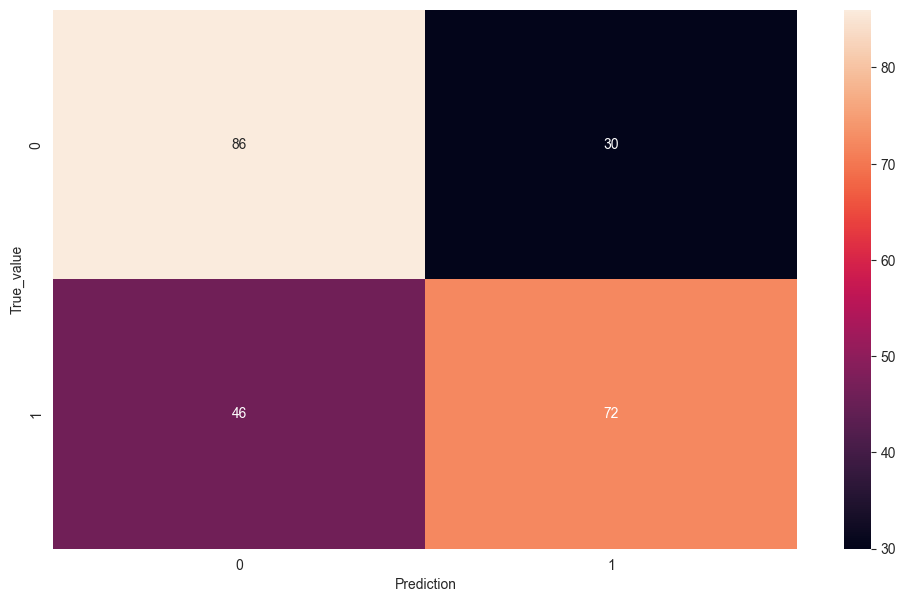

In [68]:
import tensorflow as tf

#Confusion Matrix - verify accuracy of each class
import seaborn as sns
cm = tf.math.confusion_matrix(labels = y_test_index, predictions = prediction_accent_rounded)
plt.figure(figsize = (12,7))
sns.heatmap(cm,annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('True_value')

Text(120.72222222222221, 0.5, 'True_value')

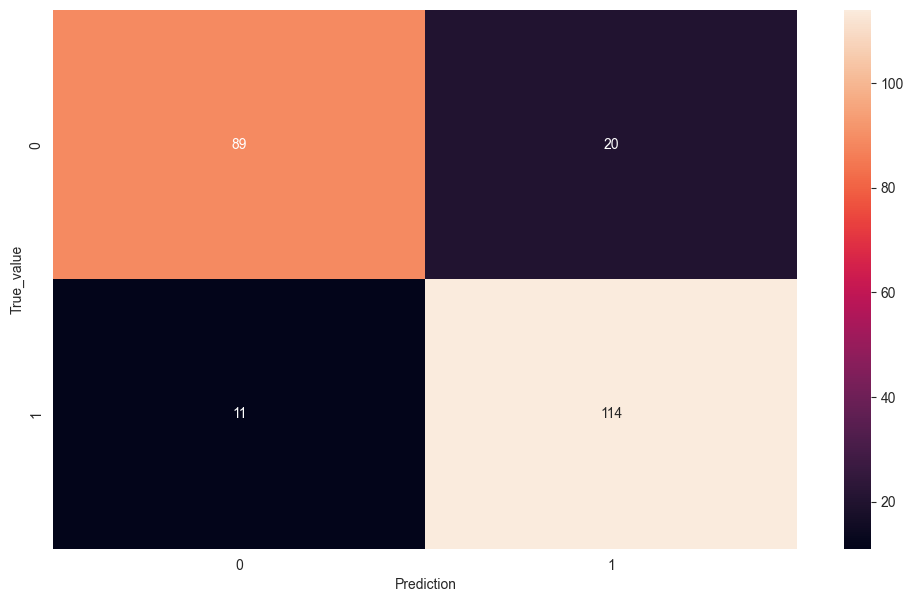

In [69]:
prediction_gender_rounded = [np.argmax(i) for i in gender_prediction]
# prediction_ANN_rounded[0]
y_test_gender_index = [np.argmax(i) for i in y_gender_test]
cm = tf.math.confusion_matrix(labels = y_test_gender_index, predictions = prediction_gender_rounded)
plt.figure(figsize = (12,7))
sns.heatmap(cm,annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('True_value')

In [70]:
from sklearn.metrics import classification_report

print(classification_report(y_test_gender_index, prediction_gender_rounded))

              precision    recall  f1-score   support

           0       0.89      0.82      0.85       109
           1       0.85      0.91      0.88       125

    accuracy                           0.87       234
   macro avg       0.87      0.86      0.87       234
weighted avg       0.87      0.87      0.87       234


In [71]:
print(classification_report(y_test_index, prediction_accent_rounded))

              precision    recall  f1-score   support

           0       0.65      0.74      0.69       116
           1       0.71      0.61      0.65       118

    accuracy                           0.68       234
   macro avg       0.68      0.68      0.67       234
weighted avg       0.68      0.68      0.67       234


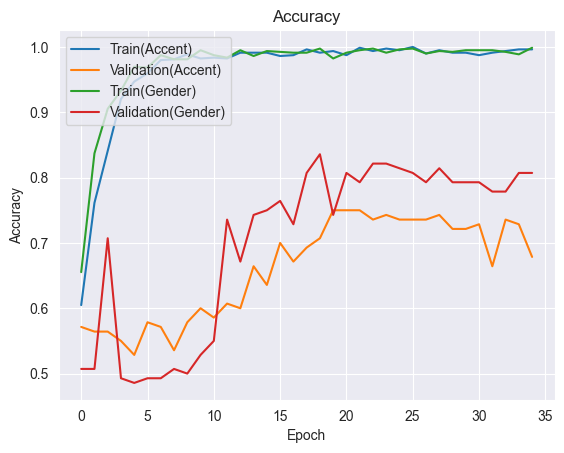

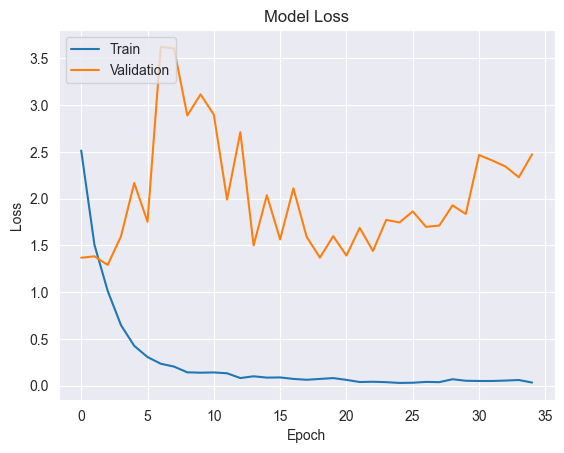

In [72]:
# Plot training and validation accuracy values
plt.plot(history_multitask_cnn.history['output_accent_accuracy'])
plt.plot(history_multitask_cnn.history['val_output_accent_accuracy'])
plt.plot(history_multitask_cnn.history['output_gender_accuracy'])
plt.plot(history_multitask_cnn.history['val_output_gender_accuracy'])
plt.title('Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train(Accent)','Validation(Accent)', 'Train(Gender)','Validation(Gender)'], loc = 'upper left')
plt.show()

# Plot training and validation accuracy values
plt.plot(history_multitask_cnn.history['loss'])
plt.plot(history_multitask_cnn.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'], loc = 'upper left')
plt.show()

# LSTM

### LSTM - Accent classification

In [73]:
def create_LSTM():
    # Create CNN model
    input_layer = Input(shape=(13, 862), name='Input')
    
    lstm_1 = LSTM(64, return_sequences=True)(input_layer)
    lstm_2 = LSTM(64)(lstm_1)
    dense = Dense(64, activation='relu',name='Hidden_1')(lstm_2)
    
#     lstm_3 = LSTM(64, stateful=False)(lstm_2)
    dropout = Dropout(0.5)(dense)
    # output
    out_accent = Dense(2, activation='sigmoid',name='output_accent')(dropout)
#     out_gender = Dense(2, activation='sigmoid',name='output_gender')(dropout)

    model = Model(inputs = input_layer ,outputs=out_accent)
    return model

In [74]:
accent_lstm = create_LSTM()

In [75]:
accent_lstm.compile(optimizer='Adam',loss='binary_crossentropy', metrics =['accuracy'])

In [76]:
## Trianing my model
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime 

num_epochs = 35
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath=OUTPUT_DIR +'saved_models/accent_classification.h5', 
                               verbose=1, save_best_only=True,patience=10, mode='max', monitor='val_accuracy')
early_stopping = EarlyStopping(monitor="val_loss", mode="min", patience=7)

start = datetime.now()

history_accent_lstm = accent_lstm.fit(X_train, y_accent_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_val, y_accent_val), callbacks=[checkpointer, early_stopping], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/35
25/25 [==============================] - ETA: 0s - loss: 0.6938 - accuracy: 0.5455
Epoch 1: val_accuracy improved from -inf to 0.53571, saving model to ./working/saved_models\accent_classification.h5
25/25 [==============================] - 7s 77ms/step - loss: 0.6938 - accuracy: 0.5455 - val_loss: 0.6831 - val_accuracy: 0.5357
Epoch 2/35
 1/25 [>.............................] - ETA: 0s - loss: 0.6699 - accuracy: 0.6250

C:\Users\musah\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


24/25 [===========================>..] - ETA: 0s - loss: 0.6551 - accuracy: 0.6354
Epoch 2: val_accuracy did not improve from 0.53571
25/25 [==============================] - 1s 27ms/step - loss: 0.6530 - accuracy: 0.6376 - val_loss: 0.6803 - val_accuracy: 0.5214
Epoch 3/35
25/25 [==============================] - ETA: 0s - loss: 0.5145 - accuracy: 0.7778
Epoch 3: val_accuracy improved from 0.53571 to 0.58571, saving model to ./working/saved_models\accent_classification.h5
25/25 [==============================] - 1s 27ms/step - loss: 0.5145 - accuracy: 0.7778 - val_loss: 0.7157 - val_accuracy: 0.5857
Epoch 4/35
25/25 [==============================] - ETA: 0s - loss: 0.2394 - accuracy: 0.9192
Epoch 4: val_accuracy improved from 0.58571 to 0.60000, saving model to ./working/saved_models\accent_classification.h5
25/25 [==============================] - 1s 27ms/step - loss: 0.2394 - accuracy: 0.9192 - val_loss: 0.9021 - val_accuracy: 0.6000
Epoch 5/35
25/25 [==============================

In [77]:
results_accent_lstm = accent_lstm.evaluate(X_test, y_accent_test)
print(results_accent_lstm)

8/8 [==============================] - 0s 12ms/step - loss: 2.3638 - accuracy: 0.5897
[2.3638455867767334, 0.5897436141967773]


### LSTM multitask

In [78]:
def create_LSTM_multi():
    # Create CNN model
    input_layer = Input(shape=(13, 862), name='Input')
    
#     lstm_1 = LSTM(64, return_sequences=True)(input_layer)
    lstm_2 = LSTM(100)(input_layer)
    
#     lstm_3 = LSTM(64, stateful=False)(lstm_2)
    dropout = Dropout(0.25)(lstm_2)
    # output
    out_accent = Dense(2, activation='sigmoid',name='output_accent')(dropout)
    out_gender = Dense(2, activation='sigmoid',name='output_gender')(dropout)

    model_cnn = Model(inputs = input_layer ,outputs=[out_accent, out_gender])
    return model_cnn

In [79]:
multitask_lstm = create_LSTM_multi()

In [80]:
multitask_lstm.compile(optimizer='Adam',loss={'output_accent':'binary_crossentropy','output_gender': 'binary_crossentropy'}, metrics ={'output_accent': 'accuracy', 'output_gender': 'accuracy'})

In [81]:
## Training my model

num_epochs = 35
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath=OUTPUT_DIR + 'saved_models/multitask_classification_lstm.h5', 
                               verbose=1, save_best_only=True,patience=10, monitor='val_loss', mode='min')
early_stopping = EarlyStopping(monitor="val_loss", mode="min", patience=10)

start = datetime.now()

history_multitask_lstm = multitask_lstm.fit(X_train, {"output_accent": y_accent_train, "output_gender": y_gender_train},validation_data=(X_val,{"output_accent": y_accent_val, "output_gender": y_gender_val}),
                        batch_size=num_batch_size, epochs=num_epochs, callbacks=[checkpointer], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/35
24/25 [===========================>..] - ETA: 0s - loss: 1.3791 - output_accent_loss: 0.6884 - output_gender_loss: 0.6908 - output_accent_accuracy: 0.5938 - output_gender_accuracy: 0.5807
Epoch 1: val_loss improved from inf to 1.37727, saving model to ./working/saved_models\multitask_classification_lstm.h5
25/25 [==============================] - 5s 64ms/step - loss: 1.3786 - output_accent_loss: 0.6872 - output_gender_loss: 0.6914 - output_accent_accuracy: 0.5934 - output_gender_accuracy: 0.5795 - val_loss: 1.3773 - val_output_accent_loss: 0.6966 - val_output_gender_loss: 0.6807 - val_output_accent_accuracy: 0.5571 - val_output_gender_accuracy: 0.5571
Epoch 2/35
24/25 [===========================>..] - ETA: 0s - loss: 1.1480 - output_accent_loss: 0.5536 - output_gender_loss: 0.5944 - output_accent_accuracy: 0.7773 - output_gender_accuracy: 0.7240
Epoch 2: val_loss improved from 1.37727 to 1.36648, saving model to ./working/saved_models\multitask_classification_lstm.h5
25/25 

In [82]:
results_multitask_lstm = multitask_lstm.evaluate(X_test, {"output_accent": y_accent_test, "output_gender": y_gender_test})
print(results_multitask_lstm)

8/8 [==============================] - 0s 11ms/step - loss: 4.5843 - output_accent_loss: 2.4024 - output_gender_loss: 2.1819 - output_accent_accuracy: 0.5556 - output_gender_accuracy: 0.5855
[4.584277153015137, 2.4024009704589844, 2.1818766593933105, 0.5555555820465088, 0.5854700803756714]


# CRNN

### CRNN - Accent classificaiton

In [83]:
from tensorflow.keras.layers import Dense, Permute, Reshape
# from tensorflow.keras.layers.wrappers import Bidirectional
from tensorflow.keras.layers import Bidirectional
def create_CRNN_model(input_shape, config, is_training=True):
    
    model = Sequential()
    
    model.add(Conv2D(32, 3, activation="relu",padding='same', input_shape=input_shape))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(32, 3, activation="relu",padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(128, 3, activation="relu",padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))

#     model.add(Conv2D(256, 3, activation="relu",padding='same'))
#     model.add(BatchNormalization())
#     model.add(MaxPooling2D(pool_size=(2, 2)))

#     model.add(Conv2D(512, 3, 3, W_regularizer=l2(weight_decay), activation="relu"))
#     model.add(BatchNormalization())
    # model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

#     model.add(Convolution2D(512, 3, 3, W_regularizer=l2(weight_decay), activation="relu"))
#     model.add(BatchNormalization())
#     model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

#     model.add(Conv2D(512, 3, 3, W_regularizer=l2(weight_decay), activation="relu"))
#     model.add(BatchNormalization())
#     model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    

#     input_layer = Input(shape=(13, 862,1), name='Input')
#     # conv 1
#     conv = Conv2D(32, 3, padding='same', activation='relu')(input_layer)
#     batchnorm = BatchNormalization()(conv)
#     maxpool = MaxPooling2D(pool_size=(2, 2))(batchnorm)
#     batchnorm1 = BatchNormalization()(maxpool)
#     # conv 2
#     conv1 = Conv2D(32, 3, padding='same', activation='relu')(batchnorm1)
#     batchnorm2 = BatchNormalization()(conv1)
#     maxpool1 = MaxPooling2D(pool_size=(2, 2))(batchnorm1)
#     batchnorm3 = BatchNormalization()(maxpool1)
#     # conv 3
#     conv2 = Conv2D(128, 3, padding='same', activation='relu')(batchnorm3)
#     batchnorm4 = BatchNormalization()(conv2)
#     maxpool2 = MaxPooling2D(pool_size=(2, 2))(batchnorm4)
#     batchnorm5 = BatchNormalization()(maxpool2)

    # (bs, y, x, c) --> (bs, x, y, c)
    model.add(Permute((2, 1, 3)))

    # (bs, x, y, c) --> (bs, x, y * c)
    bs, x, y, c = model.layers[-1].output_shape
    model.add(Reshape((x, y*c)))

    model.add(Bidirectional(LSTM(256, return_sequences=False), merge_mode="concat"))
    model.add(Dense(2, activation="sigmoid"))


    return model

In [84]:
crnn_model = create_CRNN_model((13,862,1), config)

NameError: name 'Permute' is not defined

In [ ]:
crnn_model.compile(optimizer='Adam',loss='binary_crossentropy', metrics =['accuracy'])

In [ ]:
## Trianing my model
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime 

num_epochs = 35
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath=OUTPUT_DIR +'saved_models/accent_crnn_classification.h5', 
                               verbose=1, save_best_only=True,patience=10, mode='max', monitor='val_accuracy')
early_stopping = EarlyStopping(monitor="val_loss", mode="min", patience=5)

start = datetime.now()

history_accent_lstm = crnn_model.fit(X_train, y_accent_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_val, y_accent_val), callbacks=[checkpointer, early_stopping], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

In [ ]:
from keras.models import load_model
crnn_accent_model = load_model('./working/saved_models/accent_crnn_classification.h5')
results_accent_crnn = crnn_accent_model.evaluate(X_test, y_accent_test)
print(results_accent_crnn)

### CRNN - Gender Classification 

In [ ]:
crnn_model_gender = create_CRNN_model((13,862,1), config)

In [ ]:
crnn_model_gender.compile(optimizer='Adam',loss='binary_crossentropy', metrics =['accuracy'])

In [ ]:
## Trianing my model

checkpointer = ModelCheckpoint(filepath=OUTPUT_DIR +'saved_models/gender_crnn_classification.h5', 
                               verbose=1, save_best_only=True,patience=10, mode='max', monitor='val_accuracy')
early_stopping = EarlyStopping(monitor="val_loss", mode="min", patience=5)

start = datetime.now()

history_gender_crnn = crnn_model_gender.fit(X_train, y_gender_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_val, y_gender_val), callbacks=[checkpointer, early_stopping], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

In [ ]:
from keras.models import load_model
crnn_gender_model = load_model('./working/saved_models/gender_crnn_classification.h5')
results_agender_crnn = crnn_gender_model.evaluate(X_test, y_gender_test)
print(results_agender_crnn)

### Multitask Learning- CRNN

In [ ]:
def create_CRNN_multitask_model():
    
#     model = Sequential()
    
#     model.add(Conv2D(64, 3, activation="relu",padding='same', input_shape=input_shape))
#     model.add(BatchNormalization())
#     model.add(MaxPooling2D(pool_size=(2, 2)))

#     model.add(Conv2D(128, 3, activation="relu",padding='same'))
#     model.add(BatchNormalization())
#     model.add(MaxPooling2D(pool_size=(2, 2)))

#     model.add(Conv2D(128, 3, activation="relu",padding='same'))
#     model.add(BatchNormalization())
#     model.add(MaxPooling2D(pool_size=(2, 2)))

#     model.add(Conv2D(256, 3, activation="relu",padding='same'))
#     model.add(BatchNormalization())
#     model.add(MaxPooling2D(pool_size=(2, 2)))

#     model.add(Conv2D(512, 3, 3, W_regularizer=l2(weight_decay), activation="relu"))
#     model.add(BatchNormalization())
    # model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

#     model.add(Convolution2D(512, 3, 3, W_regularizer=l2(weight_decay), activation="relu"))
#     model.add(BatchNormalization())
#     model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

#     model.add(Conv2D(512, 3, 3, W_regularizer=l2(weight_decay), activation="relu"))
#     model.add(BatchNormalization())
#     model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    

    input_layer = Input(shape=(13, 862,1), name='Input')
    # conv 1
    conv = Conv2D(32, 3, padding='same', activation='relu')(input_layer)
    batchnorm = BatchNormalization()(conv)
    maxpool = MaxPooling2D(pool_size=(2, 2))(batchnorm)
    # conv 2
    conv1 = Conv2D(32, 3, padding='same', activation='relu')(maxpool)
    batchnorm2 = BatchNormalization()(conv1)
    maxpool1 = MaxPooling2D(pool_size=(2, 2))(batchnorm2)

    # conv 3
    conv2 = Conv2D(128, 3, padding='same', activation='relu')(maxpool1)
    batchnorm4 = BatchNormalization()(conv2)
    maxpool2 = MaxPooling2D(pool_size=(2, 2))(batchnorm4)
    
    permute = Permute((2, 1, 3))(maxpool2)
    reshaped = Reshape((107, 128))(permute)

    lstm = Bidirectional(LSTM(256, return_sequences=False))(reshaped)
    
    out_accent = Dense(2, activation='sigmoid',name='output_accent')(lstm)
    out_gender = Dense(2, activation='sigmoid',name='output_gender')(lstm)

    # (bs, y, x, c) --> (bs, x, y, c)
#     model.add(Permute((2, 1, 3)))

#     # (bs, x, y, c) --> (bs, x, y * c)
#     bs, x, y, c = model.layers[-1].output_shape
#     model.add(Reshape((x, y*c)))

#     model.add(Bidirectional(LSTM(256, return_sequences=False), merge_mode="concat"))
#     model.add([Dense(2, activation="sigmoid", name='output_accent'),Dense(2, activation="sigmoid", name='output_gender')])
    model = Model(inputs = input_layer ,outputs=[out_accent, out_gender])

    return model

In [ ]:
multitask_crnn = create_CRNN_multitask_model()

In [ ]:
multitask_crnn.summary()

In [ ]:
multitask_crnn.compile(optimizer='Adam',loss={'output_accent':'binary_crossentropy','output_gender': 'binary_crossentropy'}, metrics ={'output_accent': 'accuracy', 'output_gender': 'accuracy'})

In [ ]:
## Training my model

num_epochs = 35
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath=OUTPUT_DIR + 'saved_models/multitask_classification_crnn.h5', 
                               verbose=1, save_best_only=True,patience=10, monitor='val_loss', mode='min')
early_stopping = EarlyStopping(monitor="val_loss", mode="min", patience=5)

start = datetime.now()

history_multitask_crnn = multitask_crnn.fit(X_train, {"output_accent": y_accent_train, "output_gender": y_gender_train},validation_data=(X_val,{"output_accent": y_accent_val, "output_gender": y_gender_val}),
                        batch_size=num_batch_size, epochs=num_epochs, callbacks=[checkpointer, early_stopping], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

In [ ]:
from keras.models import load_model
crnn_multi_model = load_model('./working/saved_models/multitask_classification_crnn.h5')
results_multitask_crnn = crnn_multi_model.evaluate(X_test, {"output_accent": y_accent_test, "output_gender": y_gender_test})
print(results_multitask_crnn)

In [ ]:
accent_prediction, gender_prediction = crnn_multi_model.predict(X_test)

prediction_accent_rounded = [np.argmax(i) for i in accent_prediction]

# prediction_ANN_rounded[0]

y_test_index = [np.argmax(i) for i in y_accent_test]


import tensorflow as tf


#Confusion Matrix - verify accuracy of each class

import seaborn as sns

cm = tf.math.confusion_matrix(labels = y_test_index, predictions = prediction_accent_rounded)

plt.figure(figsize = (12,7))

sns.heatmap(cm,annot=True, fmt='d')

plt.xlabel('Prediction')

plt.ylabel('True_value')




In [ ]:
prediction_gender_rounded = [np.argmax(i) for i in gender_prediction]

# prediction_ANN_rounded[0]

y_test_gender_index = [np.argmax(i) for i in y_gender_test]

cm = tf.math.confusion_matrix(labels = y_test_gender_index, predictions = prediction_gender_rounded)

plt.figure(figsize = (12,7))

sns.heatmap(cm,annot=True, fmt='d')

plt.xlabel('Prediction')

plt.ylabel('True_value')

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test_gender_index, prediction_gender_rounded))

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test_index, prediction_accent_rounded))

# Testing All the models

prepare test samples

In [ ]:
test_data = test_data[test_data['file_missing?']==False]

In [ ]:
test_data.head()

In [ ]:
test_data['native_language'].value_counts()

In [ ]:
test_data[test_data['sex']=='female'].head(20)

In [ ]:
test_data['filename'] = test_data['filename'].apply(lambda x: x+'.mp3')

In [ ]:
f_female_non_native = ['afrikaans1.mp3']

In [ ]:
data_path = './data/recordings/'
config = Config(sampling_rate=22050, audio_duration=20, learning_rate=0.0001, n_mfcc=13, n_classes=2)
X_female_non_native = prepare_data(f_female_non_native, config, data_path)

In [ ]:
# Play
fname_m = './data/recordings/' + 'afrikaans1.mp3'
ipd.Audio(fname_m)

In [ ]:
a=encoder.transform(['female'])
y_female_non_native_gender = to_categorical(np.array(a),  num_classes=2)
print(y_female_non_native_gender)

In [ ]:
encoder1.transform(['non-native'])

In [ ]:
encoder.transform(['female'])

# Label Encoding:
Female - 0
Male  - 1

Native - 0
Non-native - 1

In [ ]:
a=encoder1.transform(['non-native'])
y_female_non_native_accent = to_categorical(np.array(a),  num_classes=2)
print(y_female_non_native_accent)

In [ ]:
pred = crnn_multi_model.predict(X_female_non_native)

In [ ]:
print("X=%s, Accent Predicted=%s" % (pred[0], y_female_non_native_accent[0]))
print("X=%s, Gender Predicted=%s" % (pred[1], y_female_non_native_gender[0]))

In [ ]:
from keras.models import load_model
cnn_multi_model = load_model('./working/saved_models/multitask_classification_cnn.h5')
pred1 = cnn_multi_model.predict(X_female_non_native)
print("X=%s, Accent Predicted=%s" % (pred1[0], y_female_non_native_accent[0]))
print("X=%s, Gender Predicted=%s" % (pred1[1], y_female_non_native_gender[0]))

African Male accent

In [ ]:
f_male_non_native = ['afrikaans4.mp3']
X_male_non_native = prepare_data(f_female_non_native, config, data_path)

In [ ]:
a=encoder.transform(['male'])
y_male_non_native_gender = to_categorical(np.array(a),  num_classes=2)
print(y_male_non_native_gender)

In [ ]:
a=encoder1.transform(['non-native'])
y_male_non_native_accent = to_categorical(np.array(a),  num_classes=2)
print(y_male_non_native_accent)

In [ ]:
from keras.models import load_model
cnn_multi_model = load_model('./working/saved_models/multitask_classification_cnn.h5')
pred = cnn_multi_model.predict(X_male_non_native)

In [ ]:
print("X=%s, Accent Predicted=%s" % (pred[0], y_male_non_native_accent[0]))
print("X=%s, Gender Predicted=%s" % (pred[1], y_male_non_native_gender[0]))

In [ ]:
pred1 = crnn_multi_model.predict(X_male_non_native)
print("X=%s, Accent Predicted=%s" % (pred1[0], y_male_non_native_accent[0]))
print("X=%s, Gender Predicted=%s" % (pred1[1], y_male_non_native_gender[0]))

English Male

In [ ]:
file = './data/recordings/english139.mp3'

In [ ]:
X_male_native = prepare_data(['english139.mp3'], config, './data/recordings')

In [ ]:
a=encoder.transform(['male'])
y_male_native_gender = to_categorical(np.array(a),  num_classes=2)
print(y_male_native_gender)

In [ ]:
a=encoder1.transform(['native'])
y_male_native_accent = to_categorical(np.array(a),  num_classes=2)
print(y_male_native_accent)

In [ ]:
pred1 = crnn_multi_model.predict(X_male_native)
print("X=%s, Accent Predicted=%s" % (pred1[0], y_male_native_accent[0]))
print("X=%s, Gender Predicted=%s" % (pred1[1], y_male_native_gender[0]))

In [ ]:
pred1 = cnn_multi_model.predict(X_male_native)
print("X=%s, Accent Predicted=%s" % (pred1[0], y_male_native_accent[0]))
print("X=%s, Gender Predicted=%s" % (pred1[1], y_male_native_gender[0]))

US female

In [ ]:
filename = './data/recordings/english420.mp3'

In [ ]:
X_female_native = prepare_data(['english420.mp3'], config, './data/recordings')

In [ ]:
a=encoder.transform(['female'])
y_female_native_gender = to_categorical(np.array(a),  num_classes=2)
print(y_female_native_gender)
a=encoder1.transform(['native'])
y_female_native_accent = to_categorical(np.array(a),  num_classes=2)
print(y_female_native_accent)

In [ ]:
pred1 = crnn_multi_model.predict(X_female_native)
print("X=%s, Accent Predicted=%s" % (pred1[0], y_male_native_accent[0]))
print("X=%s, Gender Predicted=%s" % (pred1[1], y_male_native_gender[0]))

pred1 = cnn_multi_model.predict(X_female_native)
print("X=%s, Accent Predicted=%s" % (pred1[0], y_male_native_accent[0]))
print("X=%s, Gender Predicted=%s" % (pred1[1], y_male_native_gender[0]))

In [ ]:
from keras.models import load_model
cnn_accent_model = load_model('./working/saved_models/accent_classification_cnn.h5')
cnn_gender_model = load_model('./working/saved_models/gender_classification_cnn.h5')
ffn_multi_model = load_model('./working/saved_models/audio_classification_ffn.hdf5')
pred1 = cnn_accent_model.predict(X_female_native)
print("Accent Predicted=%s, X=%s" % (pred1[0], y_female_native_accent[0]))
pred1 = cnn_accent_model.predict(X_male_native)
print("Accent Predicted=%s, X=%s" % (pred1[0], y_male_native_accent[0]))
pred1 = cnn_accent_model.predict(X_male_non_native)
print("Accent Predicted=%s, X=%s" % (pred1[0], y_male_non_native_accent[0]))
pred1 = ffn_multi_model.predict(X_female_non_native)
print("Accent Predicted=%s, X=%s" % (pred1[0], y_female_non_native_accent[0]))
pred1 = cnn_gender_model.predict(X_female_native)
print("Accent Predicted=%s, X=%s" % (pred1[0], y_female_native_gender[0]))

In [ ]:
from keras.models import load_model
crnn_accent_model = load_model('./working/saved_models/accent_crnn_classification.h5')
crnn_gender_model = load_model('./working/saved_models/gender_crnn_classification.h5')
pred1 = crnn_accent_model.predict(X_female_native)
print("X=%s, Accent Predicted=%s" % (pred1[0], y_female_native_accent[0]))
pred1 = crnn_gender_model.predict(X_female_native)
print("X=%s, Gender Predicted=%s" % (pred1[0], y_female_native_gender[0]))

In [ ]:
ffn_multi_model = load_model('./working/saved_models/audio_classification_ffn.hdf5')
# Female, Native
pred1 = ffn_multi_model.predict(X_female_native)
print("X=%s, Accent Predicted=%s" % (pred1[0], y_female_native_accent[0]))
print("X=%s, Gender Predicted=%s" % (pred1[1], y_female_native_gender[0]))
# Male, Native
pred1 = ffn_multi_model.predict(X_male_native)
print("X=%s, Accent Predicted=%s" % (pred1[0], y_male_native_accent[0]))
print("X=%s, Gender Predicted=%s" % (pred1[1], y_male_native_gender[0]))
# Male, Non-native
pred1 = ffn_multi_model.predict(X_male_non_native)
print("X=%s, Accent Predicted=%s" % (pred1[0], y_male_non_native_accent[0]))
print("X=%s, Gender Predicted=%s" % (pred1[1], y_male_non_native_gender[0]))

# Female, Non-native
pred1 = ffn_multi_model.predict(X_female_non_native)
print("X=%s, Accent Predicted=%s" % (pred1[0], y_female_non_native_accent[0]))
print("X=%s, Gender Predicted=%s" % (pred1[1], y_female_non_native_gender[0]))

### Extra multi feature with MFCC and Chroma

# Multifeature: MFCC + Chroma

In [ ]:
# Extra
def prepare_data_multiple(fnames, config, data_dir):
    X_mfcc = np.empty(shape=(len(fnames), config.dim[0], config.dim[1], 1))
    X_chroma = np.empty(shape=(len(fnames), 12, config.dim[1], 1))
    print(X_chroma.shape)
    input_length = config.audio_length
    for i, fname in tqdm_notebook(enumerate(fnames), total=len(fnames)):
        file_path = os.path.join(data_dir, fname)
        data, _ = librosa.core.load(file_path, sr=config.sampling_rate, res_type="kaiser_fast")

        # Random offset / Padding
        if len(data) > input_length:
            max_offset = len(data) - input_length
            offset = np.random.randint(max_offset)
            data = data[offset:(input_length+offset)]
        else:
            if input_length > len(data):
                max_offset = input_length - len(data)
                offset = np.random.randint(max_offset)
            else:
                offset = 0
            data = np.pad(data, (offset, input_length - len(data) - offset), "constant")

        data_mfcc = librosa.feature.mfcc(y=data, sr=config.sampling_rate, n_mfcc=config.n_mfcc)
        data_mfcc = np.expand_dims(data_mfcc, axis=-1)
        X_mfcc[i,] = data_mfcc
        data = librosa.feature.chroma_cqt(y=data, sr=config.sampling_rate)
#         print(data.shape)
        data = np.expand_dims(data, axis=-1)
        X_chroma[i,] = data
    return X_mfcc, X_chroma

In [ ]:
X_fnames = np.array(dg['filename'])
data_path = './data/recordings/'

config = Config(sampling_rate=22050, audio_duration=20, learning_rate=0.0001, n_mfcc=12, n_classes=2)
feature_file_path = OUTPUT_DIR+'mfcc_features.npy'

X_mfcc, X_chroma = prepare_data_multiple(X_fnames, config, data_path)

In [ ]:
from sklearn.model_selection import train_test_split
X_train_mfcc, X_test_mfcc, y_gender_train, y_gender_test, y_accent_train, y_accent_test = train_test_split(X_mfcc, y_gender, y_accent, test_size=0.2, random_state=10)
print ('Train set:', X_train_mfcc.shape,  y_gender_train.shape)
print ('Test set:', X_test_mfcc.shape,  y_gender_test.shape)
X_train_chroma, X_test_chroma, _, _, _, _ = train_test_split(X_chroma, y_gender, y_accent, test_size=0.2, random_state=10)

X_train_mfcc, X_val_mfcc, _, _, _, _ = train_test_split(X_train_mfcc, y_gender_train, y_accent_train, test_size=0.15, random_state=10)
X_train_chroma, X_val_chroma, y_gender_train, y_gender_val, y_accent_train, y_accent_val = train_test_split(X_train_chroma, y_gender_train, y_accent_train, test_size=0.15, random_state=10)

mean = np.mean(X_train_mfcc, axis=0)
std = np.std(X_train_mfcc, axis=0)

X_train_mfcc = (X_train_mfcc - mean)/std
X_val_mfcc = (X_val_mfcc - mean)/std
X_test_mfcc = (X_test_mfcc - mean)/std

mean = np.mean(X_train_chroma, axis=0)
std = np.std(X_train_chroma, axis=0)

X_train_chroma = (X_train_chroma - mean)/std
X_val_chroma= (X_val_chroma - mean)/std
X_test_chroma = (X_test_chroma - mean)/std

In [ ]:
X_train_chroma.shape

In [ ]:
X_train_mfcc.shape

In [ ]:
def create_CRNN_multi_model(input_shape, is_training=True):
    
#     model = Sequential()
    
#     model.add(Conv2D(64, 3, activation="relu",padding='same', input_shape=input_shape))
#     model.add(BatchNormalization())
#     model.add(MaxPooling2D(pool_size=(2, 2)))

#     model.add(Conv2D(128, 3, activation="relu",padding='same'))
#     model.add(BatchNormalization())
#     model.add(MaxPooling2D(pool_size=(2, 2)))

#     model.add(Conv2D(128, 3, activation="relu",padding='same'))
#     model.add(BatchNormalization())
#     model.add(MaxPooling2D(pool_size=(2, 2)))

#     model.add(Conv2D(256, 3, activation="relu",padding='same'))
#     model.add(BatchNormalization())
#     model.add(MaxPooling2D(pool_size=(2, 2)))

#     model.add(Conv2D(512, 3, 3, W_regularizer=l2(weight_decay), activation="relu"))
#     model.add(BatchNormalization())
    # model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

#     model.add(Convolution2D(512, 3, 3, W_regularizer=l2(weight_decay), activation="relu"))
#     model.add(BatchNormalization())
#     model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

#     model.add(Conv2D(512, 3, 3, W_regularizer=l2(weight_decay), activation="relu"))
#     model.add(BatchNormalization())
#     model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    

    input_layer_mfcc = Input(shape=(12, 862,1), name='Input')
    input_layer_chroma = Input(shape=(12, 862,1), name='Input2')

    # conv 1
    conv_mfcc = Conv2D(32, 3, padding='same', activation='relu')(input_layer_mfcc)
    batchnorm_mfcc = BatchNormalization()(conv_mfcc)
    maxpool_mfcc = MaxPooling2D(pool_size=(2, 2))(batchnorm_mfcc)
    # conv 2
    conv1_mfcc = Conv2D(32, 3, padding='same', activation='relu')(maxpool_mfcc)
    batchnorm2_mfcc = BatchNormalization()(conv1_mfcc)
    maxpool1_mfcc = MaxPooling2D(pool_size=(2, 2))(batchnorm2_mfcc)

    # conv 3
    conv2_mfcc = Conv2D(32, 3, padding='same', activation='relu')(maxpool1_mfcc)
    batchnorm4_mfcc = BatchNormalization()(conv2_mfcc)
    maxpool2_mfcc = MaxPooling2D(pool_size=(2, 2))(batchnorm4_mfcc)
    
    # conv 1
    conv_chroma = Conv2D(32, 3, padding='same', activation='relu')(input_layer_chroma)
    batchnorm_chroma = BatchNormalization()(conv_chroma)
    maxpool_chroma = MaxPooling2D(pool_size=(2, 2))(batchnorm_chroma)
    # conv 2
    conv1_chroma = Conv2D(32, 3, padding='same', activation='relu')(maxpool_chroma)
    batchnorm2_chroma = BatchNormalization()(conv1_chroma)
    maxpool1_chroma = MaxPooling2D(pool_size=(2, 2))(batchnorm2_chroma)

    # conv 3
    conv2_chroma = Conv2D(32, 3, padding='same', activation='relu')(maxpool1_chroma)
    batchnorm4_chroma = BatchNormalization()(conv2_chroma)
    maxpool2_chroma = MaxPooling2D(pool_size=(2, 2))(batchnorm4_chroma)
    

    
    concat = Concatenate()([maxpool2_mfcc, maxpool2_chroma])
#     concat = Concatenate()([batchnorm5_mfcc, batchnorm5_chroma])
    
    permute = Permute((2, 1, 3))(concat)
    reshaped = Reshape((107, 64))(permute)

    lstm = Bidirectional(LSTM(256, return_sequences=False))(reshaped)
    
    out_accent = Dense(2, activation='sigmoid',name='output_accent')(lstm)
    out_gender = Dense(2, activation='sigmoid',name='output_gender')(lstm)

    # (bs, y, x, c) --> (bs, x, y, c)
#     model.add(Permute((2, 1, 3)))

#     # (bs, x, y, c) --> (bs, x, y * c)
#     bs, x, y, c = model.layers[-1].output_shape
#     model.add(Reshape((x, y*c)))

#     model.add(Bidirectional(LSTM(256, return_sequences=False), merge_mode="concat"))
#     model.add([Dense(2, activation="sigmoid", name='output_accent'),Dense(2, activation="sigmoid", name='output_gender')])
    model = Model(inputs = [input_layer_mfcc, input_layer_chroma] ,outputs=[out_accent, out_gender])

    return model

In [ ]:
multitask_crnn_2 = create_CRNN_multi_model((12,862,1))

In [ ]:
multitask_crnn_2.summary()

In [ ]:
multitask_crnn_2.compile(optimizer='Adam',loss={'output_accent':'binary_crossentropy','output_gender': 'binary_crossentropy'}, metrics ={'output_accent': 'accuracy', 'output_gender': 'accuracy'})

In [ ]:
## Training my model
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime 

num_epochs = 35
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath=OUTPUT_DIR + 'saved_models/multitask_multiinput_classification_crnn.h5', 
                               verbose=1, save_best_only=True,patience=10, monitor='val_loss', mode='min')
early_stopping = EarlyStopping(monitor="val_loss", mode="min", patience=5)

start = datetime.now()

history_multitask_crnn2 = multitask_crnn_2.fit({"Input": X_train_mfcc, "Input2": X_train_chroma}, {"output_accent": y_accent_train, "output_gender": y_gender_train},validation_data=({"Input": X_val_mfcc, "Input2": X_val_chroma},{"output_accent": y_accent_val, "output_gender": y_gender_val}),
                        batch_size=num_batch_size, epochs=num_epochs, callbacks=[checkpointer, early_stopping], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

In [ ]:
from keras.models import load_model
crnn_multi_model = load_model('./working/saved_models/multitask_multiinput_classification_crnn.h5')
results_multitask_crnn = crnn_multi_model.evaluate({"Input": X_test_mfcc, "Input2": X_test_chroma}, {"output_accent": y_accent_test, "output_gender": y_gender_test})
print(results_multitask_crnn)

## FFFN

In [ ]:
def ffn_multiinputs():
#     input_layer_mfcc = Input(shape=(12, 862), name='Input')
#     input_layer_chroma = Input(shape=(12, 862), name='Input2')
#     concat = Concatenate()([input_layer_mfcc, input_layer_chroma])

#     dense1=Dense(128, activation='relu',name='Hidden_1')(concat)
#     dropout1 = Dropout(0.5)(dense1)

#     dense2=Dense(256, activation='relu',name='Hidden_2')(dropout1)
#     dropout2 = Dropout(0.5)(dense2)

#     dense3=Dense(128, activation='relu',name='Hidden_3')(dropout2)
#     dropout3 = Dropout(0.5)(dense3)
#     m = tf.keras.layers.Flatten()(dropout3)

#     out_accent = Dense(2, activation='sigmoid',name='output_accent')(m)
#     out_gender = Dense(2, activation='sigmoid',name='output_gender')(m)


#     model_ffn = Model(inputs = [input_layer_mfcc,input_layer_chroma] ,outputs=[out_accent, out_gender])
#     return model_ffn
    input_layer_mfcc = Input(shape=(12, 862), name='Input')
    input_layer_chroma = Input(shape=(12, 862), name='Input2')
    

    dense1=Dense(128, activation='relu',name='Hidden_1')(input_layer_mfcc)
    dropout1 = Dropout(0.5)(dense1)

    dense2=Dense(256, activation='relu',name='Hidden_2')(dropout1)
    dropout2 = Dropout(0.5)(dense2)

    dense3=Dense(128, activation='relu',name='Hidden_3')(dropout2)
    dropout3 = Dropout(0.5)(dense3)
    
    dense1_chroma=Dense(128, activation='relu',name='Hidden_11')(input_layer_chroma)
    dropout1_chroma = Dropout(0.5)(dense1_chroma)

    dense2_chroma=Dense(256, activation='relu',name='Hidden_21')(dropout1_chroma)
    dropout2_chroma = Dropout(0.5)(dense2_chroma)

    dense3_chroma=Dense(128, activation='relu',name='Hidden_31')(dropout2_chroma)
    dropout3_chroma = Dropout(0.5)(dense3_chroma)
    concat = Concatenate()([dropout3, dropout3_chroma])
    m = tf.keras.layers.Flatten()(concat)

    out_accent = Dense(2, activation='sigmoid',name='output_accent')(m)
    out_gender = Dense(2, activation='sigmoid',name='output_gender')(m)


    model_ffn = Model(inputs = [input_layer_mfcc,input_layer_chroma] ,outputs=[out_accent, out_gender])
    return model_ffn

In [ ]:
model_ffn = ffn_multiinputs()

In [ ]:
model_ffn.summary()

In [ ]:
model_ffn.compile(optimizer='Adam',loss={'output_accent':'binary_crossentropy','output_gender': 'binary_crossentropy'}, metrics ={'output_accent': 'accuracy', 'output_gender': 'accuracy'})

In [ ]:
## Training my model
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime 

num_epochs = 35
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath=OUTPUT_DIR + 'saved_models/multitask_multiinput_classification_ffn.h5', 
                               verbose=1, save_best_only=True,patience=10, monitor='val_loss', mode='min')
early_stopping = EarlyStopping(monitor="val_loss", mode="min", patience=5)

start = datetime.now()

history_multitask_crnn2 = model_ffn.fit({"Input": X_train_mfcc, "Input2": X_train_chroma}, {"output_accent": y_accent_train, "output_gender": y_gender_train},validation_data=({"Input": X_val_mfcc, "Input2": X_val_chroma},{"output_accent": y_accent_val, "output_gender": y_gender_val}),
                        batch_size=num_batch_size, epochs=num_epochs, callbacks=[checkpointer, early_stopping], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

In [ ]:
from keras.models import load_model
crnn_multi_model = load_model('./working/saved_models/multitask_multiinput_classification_ffn.h5')
results_multitask_crnn = crnn_multi_model.evaluate({"Input": X_test_mfcc, "Input2": X_test_chroma}, {"output_accent": y_accent_test, "output_gender": y_gender_test})
print(results_multitask_crnn)

### CNN with multi inputs

In [ ]:
def create_cnn_model2():
    # Create CNN model
    input_layer_mfcc = Input(shape=(12, 862,1), name='Input')
    input_layer_chroma = Input(shape=(12, 862,1), name='Input2')
    # conv 1
    conv = Conv2D(16, 3, padding='same', activation='relu')(input_layer_mfcc)
    batchnorm = BatchNormalization()(conv)
    maxpool = MaxPooling2D(pool_size=(2, 2))(batchnorm)
    batchnorm1 = BatchNormalization()(maxpool)
    # conv 2
    conv1 = Conv2D(16, 3, padding='same', activation='relu')(batchnorm1)
    batchnorm2 = BatchNormalization()(conv1)
    maxpool1 = MaxPooling2D(pool_size=(2, 2))(batchnorm1)
    batchnorm3 = BatchNormalization()(maxpool1)
    # conv 3
    conv2 = Conv2D(128, 3, padding='same', activation='relu')(batchnorm3)
    batchnorm4 = BatchNormalization()(conv2)
    maxpool2 = MaxPooling2D(pool_size=(2, 2))(batchnorm4)
    batchnorm5 = BatchNormalization()(maxpool2)
    
    conv_chroma = Conv2D(16, 3, padding='same', activation='relu')(input_layer_chroma)
    batchnorm_chroma = BatchNormalization()(conv_chroma)
    maxpool_chroma = MaxPooling2D(pool_size=(2, 2))(batchnorm_chroma)
    batchnorm1_chroma = BatchNormalization()(maxpool_chroma)
    # conv 2
    conv1_chroma = Conv2D(16, 3, padding='same', activation='relu')(batchnorm1_chroma)
    batchnorm2_chroma = BatchNormalization()(conv1_chroma)
    maxpool1_chroma = MaxPooling2D(pool_size=(2, 2))(batchnorm1_chroma)
    batchnorm3_chroma = BatchNormalization()(maxpool1_chroma)
    # conv 3
    conv2_chroma = Conv2D(128, 3, padding='same', activation='relu')(batchnorm3_chroma)
    batchnorm4_chroma = BatchNormalization()(conv2_chroma)
    maxpool2_chroma = MaxPooling2D(pool_size=(2, 2))(batchnorm4_chroma)
    batchnorm5_chroma = BatchNormalization()(maxpool2_chroma)
    
    concat = Concatenate()([batchnorm5, batchnorm5_chroma])

    
    
    # flatten
    flatten = Flatten()(concat)
#     concat = Concatenate()([input_layer_mfcc, input_layer_chroma])
#     dense = Dense(64, activation='relu',name='Hidden_1')(flatten)
#     dropout = Dropout(0.5)(dense)
    # output
    out_accent = Dense(2, activation='sigmoid',name='output_accent')(flatten)
    out_gender = Dense(2, activation='sigmoid',name='output_gender')(flatten)
    model = Model(inputs = [input_layer_mfcc,input_layer_chroma] ,outputs=[out_accent, out_gender])
    return model

In [ ]:
multinput_cnn_multi = create_cnn_model2()

In [ ]:
multinput_cnn_multi.compile(optimizer='Adam',loss={'output_accent':'binary_crossentropy','output_gender': 'binary_crossentropy'}, metrics ={'output_accent': 'accuracy', 'output_gender': 'accuracy'})

In [ ]:
## Training my model
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime 

num_epochs = 35
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath=OUTPUT_DIR + 'saved_models/multitask_multiinput_classification_cnn.h5', 
                               verbose=1, save_best_only=True,patience=10, monitor='val_loss', mode='min')
early_stopping = EarlyStopping(monitor="val_loss", mode="min", patience=5)

start = datetime.now()

history_multinput_cnn_multi = multinput_cnn_multi.fit({"Input": X_train_mfcc, "Input2": X_train_chroma}, {"output_accent": y_accent_train, "output_gender": y_gender_train},validation_data=({"Input": X_val_mfcc, "Input2": X_val_chroma},{"output_accent": y_accent_val, "output_gender": y_gender_val}),
                        batch_size=num_batch_size, epochs=num_epochs, callbacks=[checkpointer, early_stopping], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

In [ ]:
from keras.models import load_model
crnn_multi_model = load_model('./working/saved_models/multitask_multiinput_classification_cnn.h5')
results_multitask_crnn = crnn_multi_model.evaluate({"Input": X_test_mfcc, "Input2": X_test_chroma}, {"output_accent": y_accent_test, "output_gender": y_gender_test})
print(results_multitask_crnn)

In [ ]:
def create_cnn_model2():
    # Create CNN model
#     input_layer_mfcc = Input(shape=(12, 862,1), name='Input')
    input_layer_chroma = Input(shape=(12, 862,1), name='Input2')
#     # conv 1
#     conv = Conv2D(32, 3, padding='same', activation='relu')(input_layer_mfcc)
#     batchnorm = BatchNormalization()(conv)
#     maxpool = MaxPooling2D(pool_size=(2, 2))(batchnorm)
#     batchnorm1 = BatchNormalization()(maxpool)
#     # conv 2
#     conv1 = Conv2D(32, 3, padding='same', activation='relu')(batchnorm1)
#     batchnorm2 = BatchNormalization()(conv1)
#     maxpool1 = MaxPooling2D(pool_size=(2, 2))(batchnorm1)
#     batchnorm3 = BatchNormalization()(maxpool1)
#     # conv 3
#     conv2 = Conv2D(128, 3, padding='same', activation='relu')(batchnorm3)
#     batchnorm4 = BatchNormalization()(conv2)
#     maxpool2 = MaxPooling2D(pool_size=(2, 2))(batchnorm4)
#     batchnorm5 = BatchNormalization()(maxpool2)
    
    conv_chroma = Conv2D(32, 3, padding='same', activation='relu')(input_layer_chroma)
    batchnorm_chroma = BatchNormalization()(conv_chroma)
    maxpool_chroma = MaxPooling2D(pool_size=(2, 2))(batchnorm_chroma)
    batchnorm1_chroma = BatchNormalization()(maxpool_chroma)
    # conv 2
    conv1_chroma = Conv2D(64, 3, padding='same', activation='relu')(batchnorm1_chroma)
    batchnorm2_chroma = BatchNormalization()(conv1_chroma)
    maxpool1_chroma = MaxPooling2D(pool_size=(2, 2))(batchnorm1_chroma)
    batchnorm3_chroma = BatchNormalization()(maxpool1_chroma)
    # conv 3
    conv2_chroma = Conv2D(128, 3, padding='same', activation='relu')(batchnorm3_chroma)
    batchnorm4_chroma = BatchNormalization()(conv2_chroma)
    maxpool2_chroma = MaxPooling2D(pool_size=(2, 2))(batchnorm4_chroma)
    batchnorm5_chroma = BatchNormalization()(maxpool2_chroma)
    
#     concat = Concatenate()([batchnorm5, batchnorm5_chroma])
    
    # flatten
    flatten = Flatten()(batchnorm5_chroma)
#     concat = Concatenate()([input_layer_mfcc, input_layer_chroma])
    dense = Dense(64, activation='relu',name='Hidden_1')(flatten)
    dropout = Dropout(0.5)(dense)
    # output
    out = Dense(2, activation='sigmoid',name='output')(dropout)
    model = Model(inputs = input_layer_chroma ,outputs=out)
    return model

In [ ]:
multinput_cnn_accent = create_cnn_model2()

In [ ]:
multinput_cnn_accent.compile(optimizer='Adam',loss='binary_crossentropy', metrics =['accuracy'])

In [ ]:
## Training my model
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime 

num_epochs = 35
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath=OUTPUT_DIR + 'saved_models/multitask_multiinput_classification_ffn.h5', 
                               verbose=1, save_best_only=True,patience=10, monitor='val_loss', mode='min')
early_stopping = EarlyStopping(monitor="val_loss", mode="min", patience=5)

start = datetime.now()

history_multitask_crnn2 = multinput_cnn_accent.fit({"Input": X_train_mfcc, "Input2": X_train_chroma}, y_accent_train,validation_data=({"Input": X_val_mfcc, "Input2": X_val_chroma},y_accent_val),batch_size=num_batch_size, epochs=num_epochs, callbacks=[checkpointer, early_stopping], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

# HYBRID CNN-LSTM

In [3]:
def hybrid_CNN_LSTM_multi():
    """Creates a hybrid CNN-LSTM model for multitask classification.

    Returns:
        A Keras model.
    """

    # Create CNN model
    cnn_model = create_multitask_cnn()

    # Create LSTM model
    lstm_model = create_LSTM_multi()

    # Connect output of CNN model to input of LSTM model
    cnn_output = cnn_model.output
    lstm_input = lstm_model.input
    lstm_output = lstm_model(cnn_output)

    # Create output layer
    output_accent = Dense(2, activation='sigmoid', name='output_accent')(lstm_output)
    output_gender = Dense(2, activation='sigmoid', name='output_gender')(lstm_output)

    # Create hybrid model
    hybrid_model = Model(inputs=cnn_model.input, outputs=[output_accent, output_gender])

    return hybrid_model


In [ ]:
# Example usage
hybrid_model = hybrid_CNN_LSTM_multi()


In [ ]:
# Compile hybrid model
hybrid_model.compile(optimizer='Adam', loss={'output_accent':'binary_crossentropy','output_gender': 'binary_crossentropy'}, metrics ={'output_accent': 'accuracy', 'output_gender': 'accuracy'})
hybrid_model.summary()

In [ ]:
num_batch_size = 32
num_epochs = 35
# Train hybrid model
hybrid_model.fit(
    X_train, 
    {"output_accent": y_accent_train, "output_gender": y_gender_train},
    validation_data=(X_val,{"output_accent": y_accent_val, "output_gender": y_gender_val}),
    batch_size=num_batch_size, 
    epochs=num_epochs,
)
